<a href="https://colab.research.google.com/github/koalalovepabro/Deep-Learning/blob/main/03_%ED%99%9C%EC%84%B1%ED%99%94_%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망의 등장
다층 퍼셉트론은 단층 퍼셉트론으로는 계산 할 수 없는 복잡한 함수들을 표현할 수 있다. 다층 퍼셉트론을 층처럼 겹겹이 쌓은 것을 인공 신경망(Artificial Neural Network)

## 활성화 함수
* 인공 신경망의 퍼셉트론을 **유닛, 노드, 뉴런**이라고 표현
* 퍼셉트론의 결과물은 0 또는 1로만 출력 되는 것
* 0이나 1 뿐만이 아닌 유닛이 다양한 계산을 할 수 있게끔 값을 조정해 주는 것이 **활성화 함수**

### 퍼셉트론 수식
$
z= w_1x_1 + w_2x_2 + b 
$
식에 의해 퍼셉트론을 구현 하려면 조건이 필요했었어요.
$$
u(z) = \begin{cases} 
0\enspace(z \leq 0)
\\ 1\enspace(z > 0) \end{cases}
$$

함수 $u$는 퍼셉트론이라는 유닛의 결과물을 내기 위한 **계단 함수** 이 함수 $u$는 퍼셉트론의 **활성화 함수**라고 한다.

## 일반화된 뉴런의 수식
$$
z= w_1x_1 + w_2x_2 + b
$$

$$
y = a( w_1x_1 + w_2x_2 + b )
$$

함수 $a$를 활성화 함수(Activation Function)라고 하며, 각 입력값에 대한 활성화 함수를 적용시켜 최종적으로 $y$값이 결정지어지게 된다.

### 우리가 여기서 배울건??
단순하게 0과 1로만 표현하는 계단 함수 $u$를 넘어서,**다양한 값( 실숫값 )**으로 표현이 가능한 활성화 함수를 배운다.

# 뉴런이 값을 다양하게 표현한다는 것의 의미(비선형 활성화 함수를 사용하는 이유)
* 왜 계단 함수 같은 선형 함수는 활성화 함수로 사용하지 않는가?
  - 예를 들어 활성화 함수가 $a(z) = cz_{(c는 상수)}$
  - 층을 여러 개(3층) 쌓게 되면? $y = a(a(a(z)))$
  - 이는 $y = c^3z$ 로 표현이 가능함
  - 몇 층을 쌓아도 단순하게 상수에 $z$를 곱한 형식으로 표현이 됨
  - 뉴런을 겹겹이 쌓는 의미가 사라진다.
* 비선형 함수를 사용하게 되면?
  - 값의 표현이 다채로워 진다.
  - 층을 쌓거나, 다른 활성화 함수를 사용했을 때 뉴런의 표현(뉴런의 출력)이 다채롭게 된다.

# 활성화 함수 #1 시그모이드($\sigma$)
* $
\sigma(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }
$, $z=WX+b$
* $\sigma$는 어떠한 값이 들어오든 항상 **0보다 크고 1보다 작은 실수**를 출력한다.
* 값이 무한대로 커질 수록 1에 가까워 지지만, 절대 1이 되진 않는다.
* 값이 무한대로 작아질 수록 0에 가까워 지지만, 절대 0이 되진 않는다.

## 시그모이드 함수의 의미
* 뉴런의 연산에서는 입력 신호의 출력 강도(세기)를 의미한다.
  - 다음 층에 얼마나 강하게 값을 넘길 것인가.
  - 계단 함수는 단순하게 활성화가 된다(1), 안된다(0)
  - 시그모이드 함수는 이 만큼 강하게 활성화가 된다( 1에 가까운 실수 ), 이 만큼 약하게 활성화가 된다( 0에 가까운 실수 )

* 출력 (결과물 출력 - 예측) 에서는 0 또는 1이 될 **확률**을 의미 한다.
  - 0.5를 기준으로 0.5보다 작으면 0으로 분류될 확률이 크다 라는 것을 의미
  - 0.5를 기준으로 0.5보다 크면 1로 분류될 확률이 크다 라는 것을 의미 합니다.
  - 예를 들어 시그모이드의 출력이 0.4
     - 1로 분류될 확률이 40%
     - 0으로 분류될 확률이 60%

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 계단 함수 구현하기
def step_function(z):
  return np.array(z > 0, dtype=np.int)

# 시그모이드 함수 구현하기
# 자연상수 e의 지수함수는 넘파이에 np.exp 에 구현 되어 있다.
def sigmoid(z):
  return 1 / (1 + np.exp(-z)) # np.exp(-z)  => e의 -z제곱

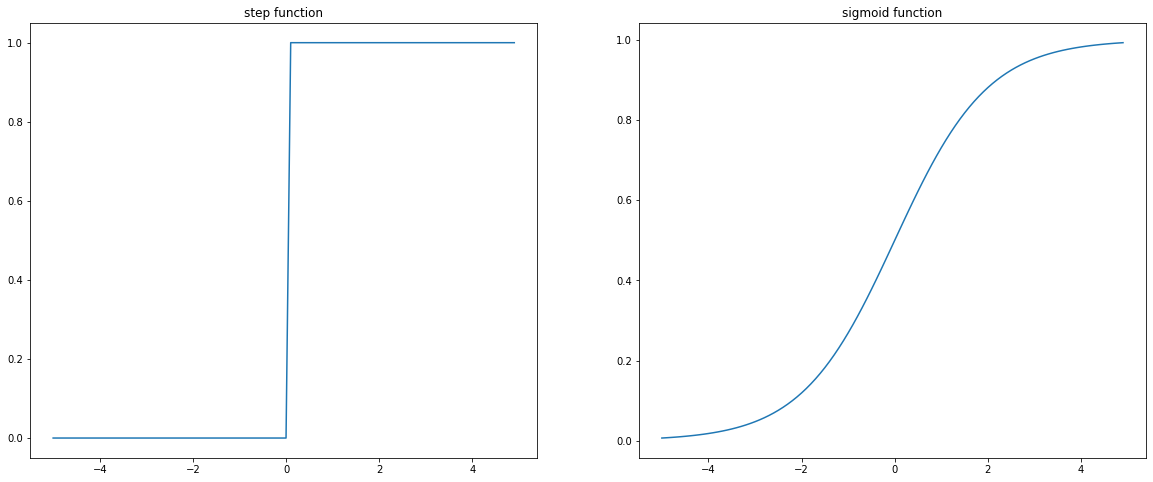

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8))
x = np.arange(-5.0, 5.0, 0.1)

ax1.plot(x, step_function(x))
ax1.set_title('step function')

ax2.plot(x, sigmoid(x))
ax2.set_title('sigmoid function')

plt.show()

# 활성화 함수 #2 ReLU(Rectified Linear Unit)
* 이미지 처리에 주로 사용되어지는 함수
* 최근에는 다양한 분야에서도 효과를 발휘한다고 알려져 있다.
* 이미지 처리를 위한 `CNN` 알고리즘과 찰떡궁합인 함수
* 입력값이 0을 넘으면 그 입력을 그대로 출력, 0 이하면 0을 출력하는 함수
* $relu(x) = \begin{cases} 
0\enspace(x \leq 0)
\\ x\enspace(x > 0) \end{cases}$

In [ ]:
# 음수 데이터면 0, 양수 데이터면 해당 데이터가 그대로 출력
def relu(z):
  return np.maximum(0, z) # maximum : 둘 중 큰 값을 출력

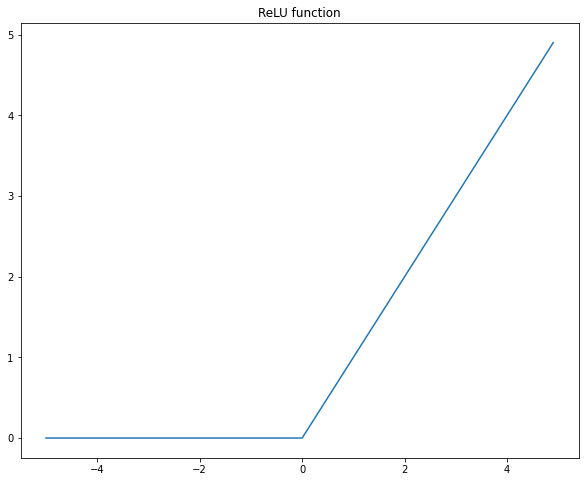

In [ ]:
plt.figure(figsize=(10, 8))
x = np.arange(-5.0, 5.0, 0.1)
plt.title('ReLU function')
plt.plot(x, relu(x))
plt.show()

## ReLU를 사용하는 이유
* 최근에는 시그모이드 보다는 비선형 직선을 여러 개 연결하는 ReLU를 더 많이 사용하는 추세
  - $\sigma$는 곡선함수라서 연산 비용( CPU나 GPU의 연산 )이 많이 들어간다.
  - 따라서 필요에 따라 ReLU를 여러 개 붙여서 사용 하는 것이 도움이 될때가 많다.
  - 물론 데이터에 따라서 종류나 특징에 따라 성능은 달라진다.
* 이미지 처리에서 ReLU를 사용하는 이유
  - 이미지는 항상 0 ~ 255 까지의 정수로 이루어져 있다. (채널의 픽셀 값)
  - 이미지도 신경망의 연산($WX+b$)에 따라서 실수의 형태로 출력이 되게 된다.
  - 연산에 의해서 실수화가 되다 보니 음수값이 등장하기 시작한다.
  - 하지만 이미지에서는 음수 데이터는 사용하지 않는 데이터 이기 때문에, 음수로 연산된 데이터를 0으로 만들어서 연산의 부담을 줄여준다.
  - 결론적으로 결과물을 증폭시키는 양수 데이터만 사용하게 되어, 필요 없는 부분은 생각하지 않고, 이미지 처리에 필요한 부분만 생각하게 된다.


# 활성화 함수 #3 하이퍼볼릭 탄젠트(tanh)
* 텍스트 처리에 주로 사용되어지는 활성화 함수
* 시그모이드와 비슷한 모양이지만, -1 ~ 1 사이의 값으로 출력

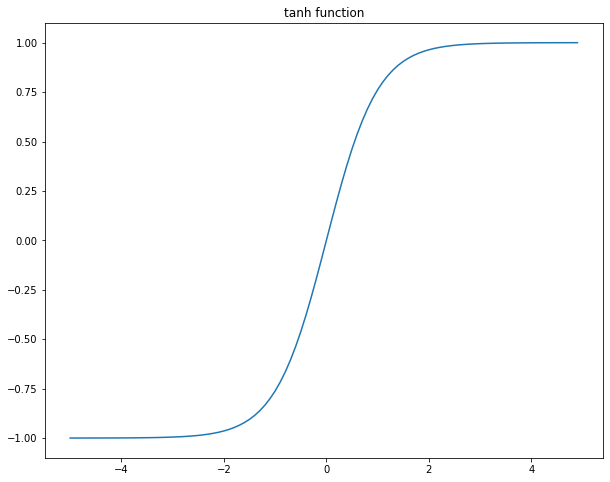

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
plt.figure(figsize=(10, 8))
plt.title('tanh function')
plt.plot(x, np.tanh(x))
plt.show()

Q & A